Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Crop_Type           99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
 11  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 9.1+ MB
None

Dataset Preview:
       State_Name Crop_Type       Crop    N   P   K    pH  rainfall  \
0  andhra pradesh    kharif     cot

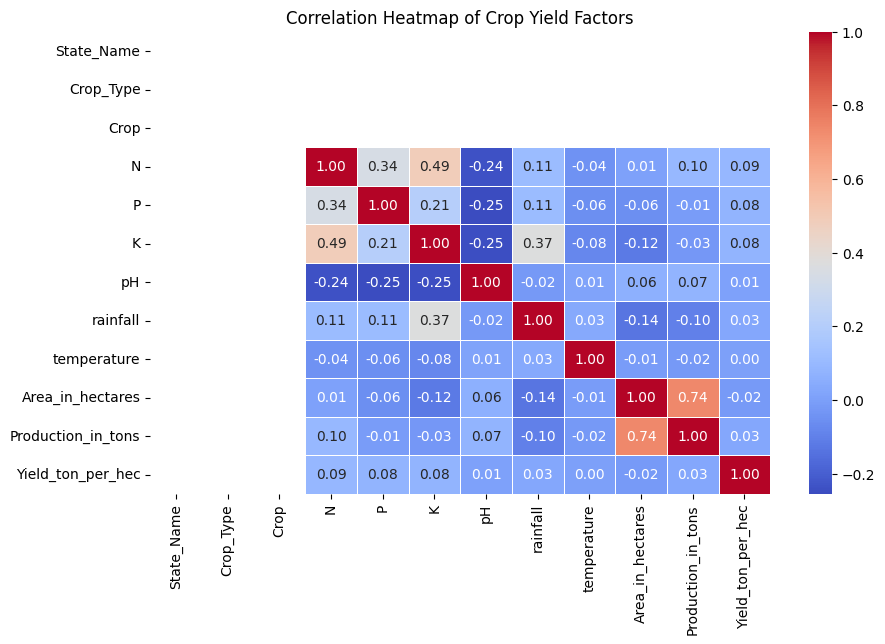

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "Dataset_crop.csv"
data = pd.read_csv(file_path)

# Display initial information
print("Dataset Info:")
print(data.info())

print("\nDataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Ensure all columns are in correct data types
# Attempt to convert columns that should be numeric to numeric, forcing errors to NaN
data_cleaned = data.apply(pd.to_numeric, errors='coerce')

# Now, select only numeric columns for the correlation matrix
numeric_data = data_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Crop Yield Factors")
plt.show()

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Dataset_crop.csv')

In [6]:
df.head()

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [ ]:
print(df.columns)

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')


In [10]:
df.columns = df.columns.str.strip()

In [11]:
df.drop('State_Name: 0', axis=1, inplace=True, errors='ignore')

In [12]:
state_columns = [col for col in df.columns if 'State_Name' in col]
print(state_columns)

['State_Name']


In [13]:
df.shape

(99849, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Crop_Type           99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
 11  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 9.1+ MB


In [15]:
df.isnull().sum()

State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(99849, 12)

In [20]:
df.describe()

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
count,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,9.984900e+04,99849.000000
mean,69.816823,41.593656,42.037827,5.643624,701.151085,26.684154,16476.585668,3.776291e+04,3.931149
std,39.571469,15.056508,28.430263,0.505283,604.701552,4.851214,43604.268231,1.222447e+05,33.872242
min,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000e+00,0.000000
25%,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,130.000000,1.620000e+02,0.586207
50%,75.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1010.000000,1.506000e+03,1.329268
75%,80.000000,60.000000,50.000000,5.960000,1110.780000,29.266667,8099.000000,1.439500e+04,2.997288
max,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667,726300.000000,3.530571e+06,9801.000000


In [25]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                           N         P         K        pH  rainfall  \
N                   1.000000  0.342521  0.486650 -0.235437  0.111900   
P                   0.342521  1.000000  0.210349 -0.254776  0.110686   
K                   0.486650  0.210349  1.000000 -0.246708  0.369173   
pH                 -0.235437 -0.254776 -0.246708  1.000000 -0.021997   
rainfall            0.111900  0.110686  0.369173 -0.021997  1.000000   
temperature        -0.044755 -0.056988 -0.078606  0.012203  0.034479   
Area_in_hectares    0.009287 -0.057514 -0.120388  0.060136 -0.135261   
Production_in_tons  0.097888 -0.010698 -0.026379  0.073654 -0.097948   
Yield_ton_per_hec   0.090223  0.076806  0.076198  0.006427  0.026492   

                    temperature  Area_in_hectares  Production_in_tons  \
N                     -0.044755          0.009287            0.097888   
P                     -0.056988         -0.057514           -0.010698   
K                     -0.078606         -0.120388           

In [ ]:
missing_values_column = data.isnull().sum()
print(missing_values_column)

State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64


In [ ]:
missing_values_record = data.isnull().sum(axis=1)
print(missing_values_record)


0        0
1        0
2        0
3        0
4        0
        ..
99844    0
99845    0
99846    0
99847    0
99848    0
Length: 99849, dtype: int64


In [3]:
from sklearn.preprocessing import StandardScaler


In [4]:
ss = StandardScaler()


In [11]:
import pandas as pd


df = pd.read_csv('Dataset_crop.csv') 

df.head()


,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [13]:
df = pd.read_csv('Dataset_crop.csv')

In [14]:
print(df.dtypes)

State_Name             object
Crop_Type              object
Crop                   object
N                       int64
P                       int64
K                       int64
pH                    float64
rainfall              float64
temperature           float64
Area_in_hectares      float64
Production_in_tons    float64
Yield_ton_per_hec     float64
dtype: object
